# <center>Apple Stock Prediction<center>

In [2]:
pip install yfinance keras tensorflow sklearn matplotlib



     -------------------------------------- 939.5/939.5 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 94.6/94.6 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 508.0/508.0 kB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 64.9/64.9 kB 3.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-py3-none-any.whl size=138951 sha256=bb731834f0929205c65cdad7ed7dc9eddd5d206b700a0356d69bc7e081d75634
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\8d\0e\f8\48eb93a200fca4c502d7590613616fa4d2c9533f73


[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import yfinance as yf

In [4]:
stock_data = yf.download('AAPL', start='2015-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373955,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687304,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689537,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021713,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944683,237458000


In [6]:
data = stock_data['Close'].values
data = data.reshape(-1,1)scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [8]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]


In [9]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [11]:
X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

In [12]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [15]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
49/49 [==============================] - 11s 68ms/step - loss: 0.0074
Epoch 2/10
49/49 [==============================] - 3s 67ms/step - loss: 3.8751e-04
Epoch 3/10
49/49 [==============================] - 3s 68ms/step - loss: 3.6512e-04
Epoch 4/10
49/49 [==============================] - 3s 67ms/step - loss: 3.7401e-04
Epoch 5/10
49/49 [==============================] - 3s 67ms/step - loss: 3.0101e-04
Epoch 6/10
49/49 [==============================] - 3s 66ms/step - loss: 3.0536e-04
Epoch 7/10
49/49 [==============================] - 3s 66ms/step - loss: 3.0182e-04
Epoch 8/10
49/49 [==============================] - 3s 64ms/step - loss: 3.0190e-04
Epoch 9/10
49/49 [==============================] - 3s 68ms/step - loss: 2.5051e-04
Epoch 10/10
49/49 [==============================] - 3s 67ms/step - loss: 2.6992e-04


In [19]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 2s 29ms/step


In [20]:
train = stock_data[:train_size]
valid = stock_data[train_size:]
valid['Predictions'] = predictions

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11360\2651913846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


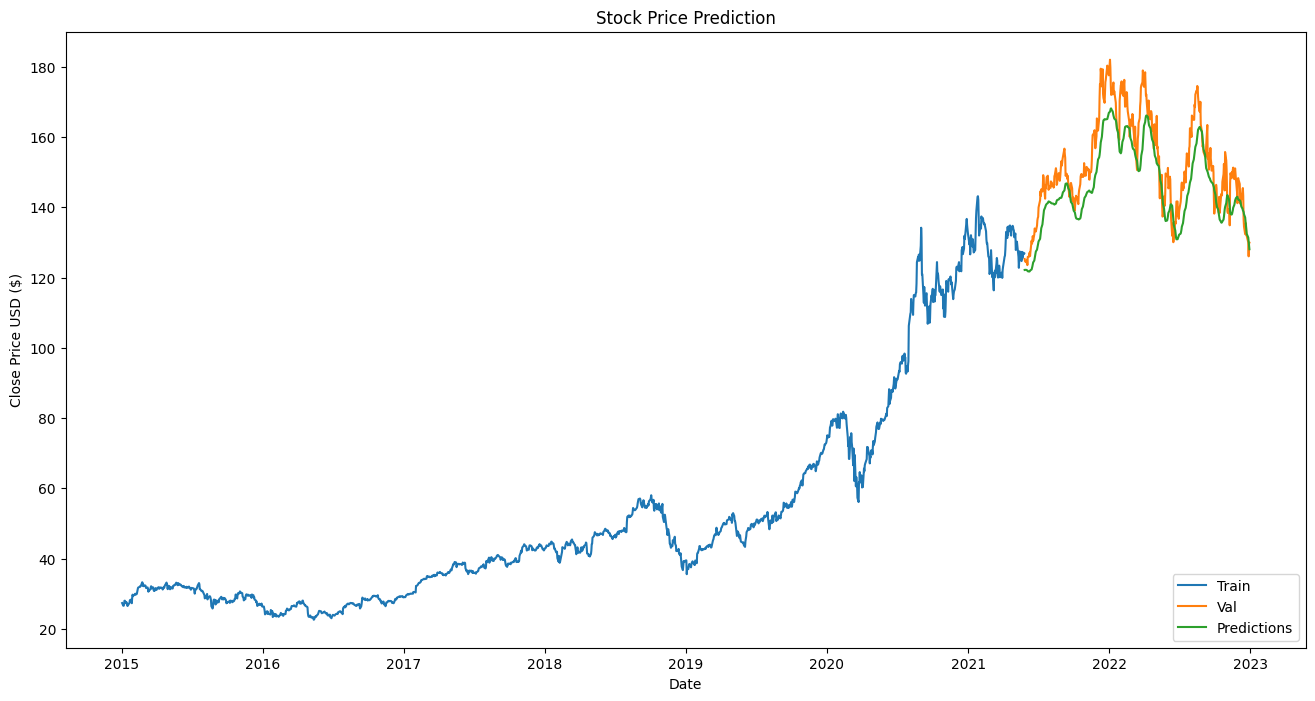

In [21]:
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [22]:
valid.tail()

,Open,High,Low,Close,Adj Close,Volume,Predictions
Date,,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.631363,63814900,132.453461
2022-12-27,131.380005,131.410004,128.720001,130.029999,128.818405,69007800,131.398880
2022-12-28,129.669998,131.029999,125.870003,126.040001,124.865585,85438400,130.335175
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.402328,75703700,129.100677
2022-12-30,128.410004,129.949997,127.430000,129.929993,128.719315,77034200,128.061096
